In [116]:
# Importing Pandas library
# and creating alias pd

import pandas as pd

In [117]:
# Load file to pandas dataframe

data = 'ASM01.csv'
df = pd.read_csv(data)

#View dataframe "df"
df

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4
...,...,...,...,...,...,...
1009,Air and Sea Travel,2024 January,Arrivals,Air,Thousand,1271.3
1010,Air and Sea Travel,2024 January,Arrivals,Sea,Thousand,31.1
1011,Air and Sea Travel,2024 January,Departures,All modes of transport,Thousand,1281.7
1012,Air and Sea Travel,2024 January,Departures,Air,Thousand,1239.5


In [118]:
# Oberving the data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  1014 non-null   object 
 1   Month            1014 non-null   object 
 2   Direction        1014 non-null   object 
 3   Mode             1014 non-null   object 
 4   UNIT             1014 non-null   object 
 5   VALUE            1014 non-null   float64
dtypes: float64(1), object(5)
memory usage: 47.7+ KB


In [119]:
#Checking if the STATISTIC Label column has only one value

df['STATISTIC Label'].unique()

array(['Air and Sea Travel'], dtype=object)

In [120]:
#Checking if the UNIT column has only one value

df['UNIT'].unique()

array(['Thousand'], dtype=object)

In [121]:
# Removing columns STATISTIC Label and UNIT on axis 1 -> columns
df = df.drop(['STATISTIC Label', 'UNIT'], axis=1)
df

,Month,Direction,Mode,VALUE
0,2010 January,Arrivals,All modes of transport,773.2
1,2010 January,Arrivals,Air,728.4
2,2010 January,Arrivals,Sea,44.8
3,2010 January,Departures,All modes of transport,791.7
4,2010 January,Departures,Air,732.4
...,...,...,...,...
1009,2024 January,Arrivals,Air,1271.3
1010,2024 January,Arrivals,Sea,31.1
1011,2024 January,Departures,All modes of transport,1281.7
1012,2024 January,Departures,Air,1239.5


In [122]:
# Convert the 'Month' column to a datetime object with Year-Month format
df['Year-Month'] = pd.to_datetime(df['Month'], format='%Y %B').dt.strftime('%Y-%m')

# Removing column Month
df.drop(columns='Month', inplace=True)

df

,Direction,Mode,VALUE,Year-Month
0,Arrivals,All modes of transport,773.2,2010-01
1,Arrivals,Air,728.4,2010-01
2,Arrivals,Sea,44.8,2010-01
3,Departures,All modes of transport,791.7,2010-01
4,Departures,Air,732.4,2010-01
...,...,...,...,...
1009,Arrivals,Air,1271.3,2024-01
1010,Arrivals,Sea,31.1,2024-01
1011,Departures,All modes of transport,1281.7,2024-01
1012,Departures,Air,1239.5,2024-01


In [123]:
#Remove all lines with 'All modes of transport"
df = df.query("`Mode` != 'All modes of transport'")
df

,Direction,Mode,VALUE,Year-Month
1,Arrivals,Air,728.4,2010-01
2,Arrivals,Sea,44.8,2010-01
4,Departures,Air,732.4,2010-01
5,Departures,Sea,59.3,2010-01
7,Arrivals,Air,757.2,2010-02
...,...,...,...,...
1007,Departures,Sea,59.8,2023-12
1009,Arrivals,Air,1271.3,2024-01
1010,Arrivals,Sea,31.1,2024-01
1012,Departures,Air,1239.5,2024-01


In [124]:
# Pivot to new data frame "df_pivoted" with method "pivot_table"
df_pivoted = df.pivot_table(index='Year-Month', columns=['Direction', 'Mode'], values='VALUE')
#Join the columns
df_pivoted.columns = ['_'.join(col) for col in df_pivoted.columns.values]

# Kepping this irformation on name of all columns
df_pivoted.columns.name = "Values_in_Thousands"

# Display the pivoted DataFrame, indexed by Year-Month (String)
df_pivoted

Values_in_Thousands,Arrivals_Air,Arrivals_Sea,Departures_Air,Departures_Sea
Year-Month,,,,
2010-01,728.4,44.8,732.4,59.3
2010-02,757.2,46.9,757.2,46.1
2010-03,906.6,83.3,919.6,81.5
2010-04,735.8,168.7,709.5,172.5
2010-05,968.5,146.4,977.9,132.9
...,...,...,...,...
2023-09,1814.8,98.7,1799.0,111.1
2023-10,1742.1,76.5,1752.1,77.6
2023-11,1352.8,44.5,1316.5,45.0


In [125]:
# Oberving the data type of each column

#df_pivoted.dtypes
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 2010-01 to 2024-01
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Arrivals_Air    169 non-null    float64
 1   Arrivals_Sea    169 non-null    float64
 2   Departures_Air  169 non-null    float64
 3   Departures_Sea  169 non-null    float64
dtypes: float64(4)
memory usage: 6.6+ KB


In [126]:
# Converting index of df_pivoted string to datetime format
# Then is possible to use methods YearLocater and DateFormatter to help adjuste the tick labels
df_pivoted.index = pd.to_datetime(df_pivoted.index)
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2010-01-01 to 2024-01-01
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Arrivals_Air    169 non-null    float64
 1   Arrivals_Sea    169 non-null    float64
 2   Departures_Air  169 non-null    float64
 3   Departures_Sea  169 non-null    float64
dtypes: float64(4)
memory usage: 6.6 KB


In [127]:
# Attempt to infer the frequency
df_pivoted.index.inferred_freq

'MS'

In [128]:
# Dataframe cleaned and prepared to perform summarization
# Now All data is on numeric format
# Lets plot the reorganized data to see what can visualize


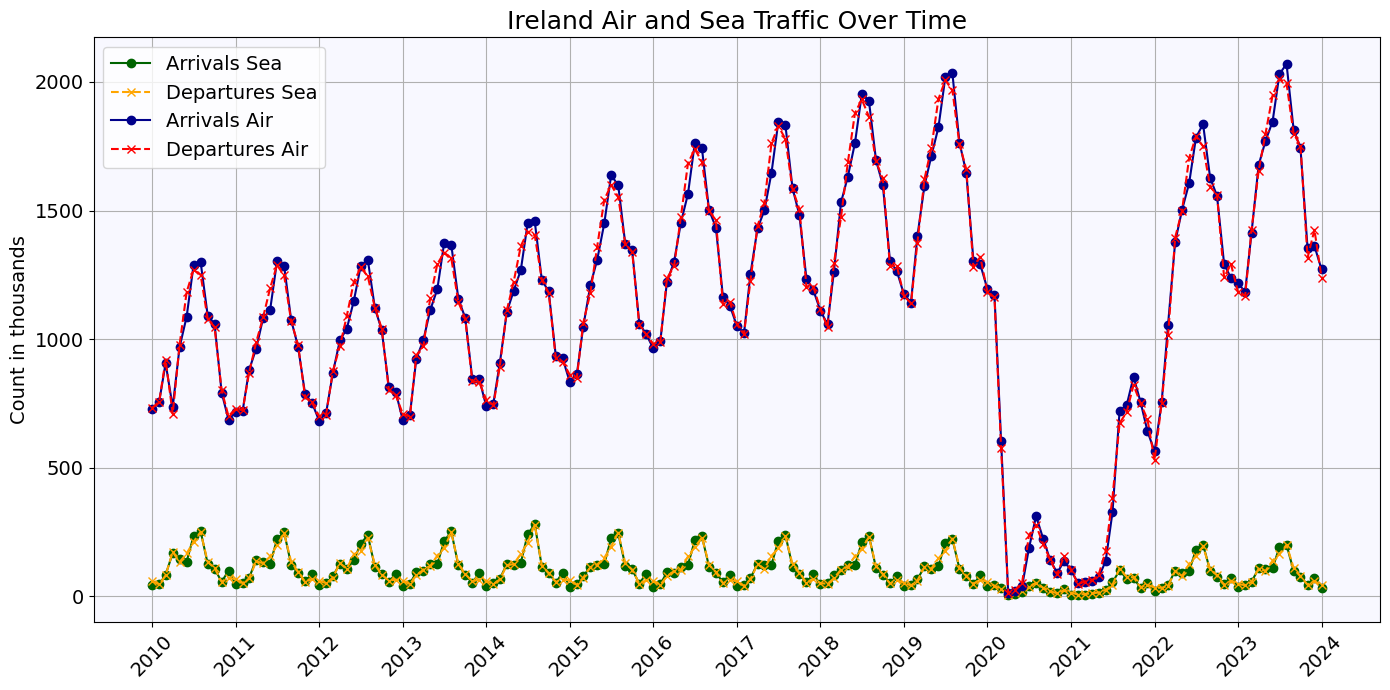

In [129]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Adjusting the size of plot
plt.figure(figsize=(14, 7))

# Creating a single subplot
ax = plt.subplot()

# Using high contrast colours and different line styles and marks, trying to improve visualization.
# Plotting Sea Traffic data 
ax.plot(df_pivoted.index, df_pivoted["Arrivals_Sea"], label='Arrivals Sea', color='darkgreen', marker='o')
ax.plot(df_pivoted.index, df_pivoted["Departures_Sea"], label='Departures Sea', color='orange', marker='x', linestyle='--')

# Plotting Air Traffic data
ax.plot(df_pivoted.index, df_pivoted["Arrivals_Air"], label='Arrivals Air', color='darkblue', marker='o')
ax.plot(df_pivoted.index, df_pivoted["Departures_Air"], label='Departures Air', color='red', marker='x', linestyle='--')

# Adjusting the plot appearance setting the title and y-axis label
ax.set_facecolor('#F8F8FF')  # "Ghost White" Background color for the plot area
ax.set_title('Ireland Air and Sea Traffic Over Time', fontsize=18)
ax.set_ylabel('Count in thousands', fontsize=14)

# Adjusting the ticks on x axis to show only the years, avoiding the months to not over load the tick labels
ax.xaxis.set_major_locator(YearLocator())  # Major ticks every year
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # Format major ticks as full years, avoinding "-01" in every year, redundant

# Inclining and adjusting the size of tick labels
ax.tick_params(axis='x', rotation=45, labelsize="14")  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize="14")  # Adjust y-axis labels appearance
ax.legend(fontsize=14)  # Display legend and set your font size
ax.grid(True)  # Create a grid in every tick

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

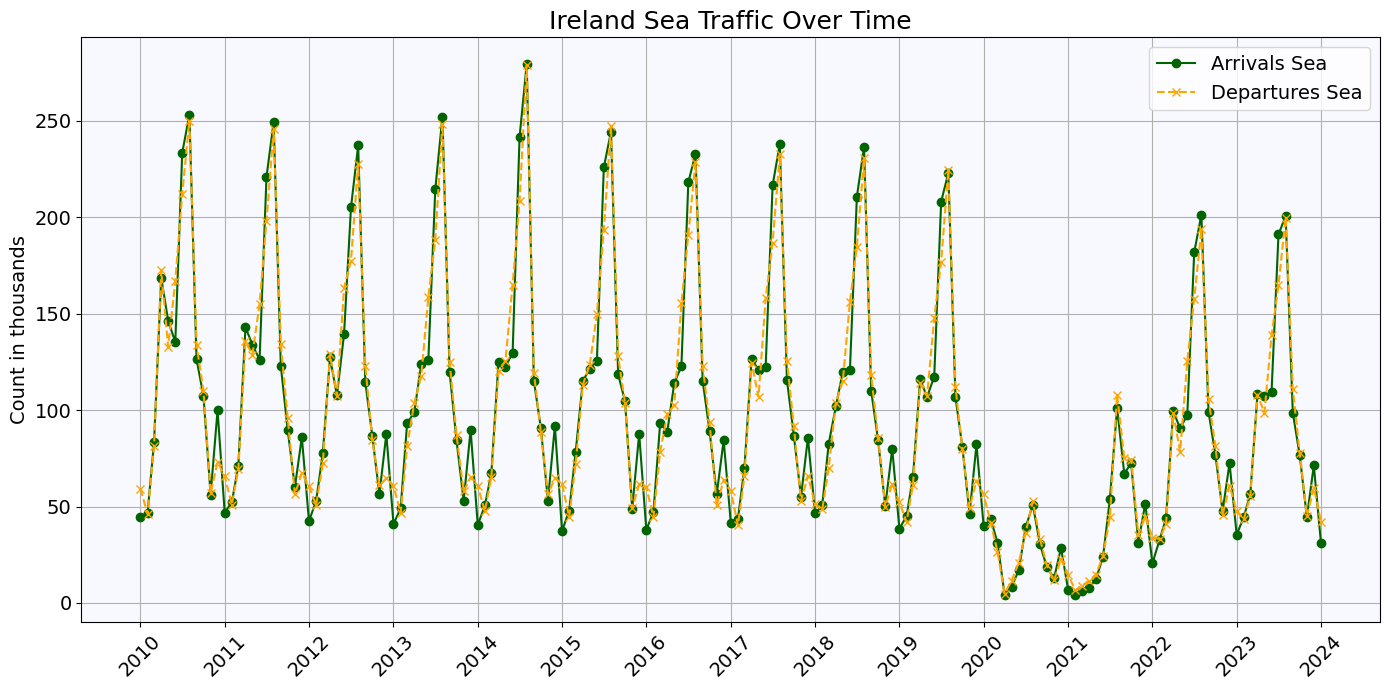

In [130]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Adjusting the size of plot
plt.figure(figsize=(14, 7))

# Creating a single subplot
ax = plt.subplot()

# Using high contrast colours and different line styles and marks trying to improve visualization.
# Plotting Sea Traffic data 
ax.plot(df_pivoted.index, df_pivoted["Arrivals_Sea"], label='Arrivals Sea', color='darkgreen', marker='o')
ax.plot(df_pivoted.index, df_pivoted["Departures_Sea"], label='Departures Sea', color='orange', marker='x', linestyle='--')

# Plotting Air Traffic data
#ax.plot(df_pivoted.index, df_pivoted["Arrivals_Air"], label='Arrivals Air', color='darkblue', marker='o')
#ax.plot(df_pivoted.index, df_pivoted["Departures_Air"], label='Departures Air', color='red', marker='x', linestyle='--')

# Adjusting the plot appearance setting the title and y-axis label
ax.set_facecolor('#F8F8FF')  # "Ghost White" Background color for the plot area
ax.set_title('Ireland Sea Traffic Over Time', fontsize=18)
ax.set_ylabel('Count in thousands', fontsize=14)

# Adjusting the ticks on x axis to show only the years, avoiding the months to not over load the tick labels
ax.xaxis.set_major_locator(YearLocator())  # Major ticks every year
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # Format major ticks as full years, avoinding "-01" in every year, redundant

# Inclining and adjusting the size of tick labels
ax.tick_params(axis='x', rotation=45, labelsize="14")  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize="14")  # Adjust y-axis labels appearance
ax.legend(fontsize=14)  # Display legend and set your font size
ax.grid(True)  # Create a grid in every tick

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

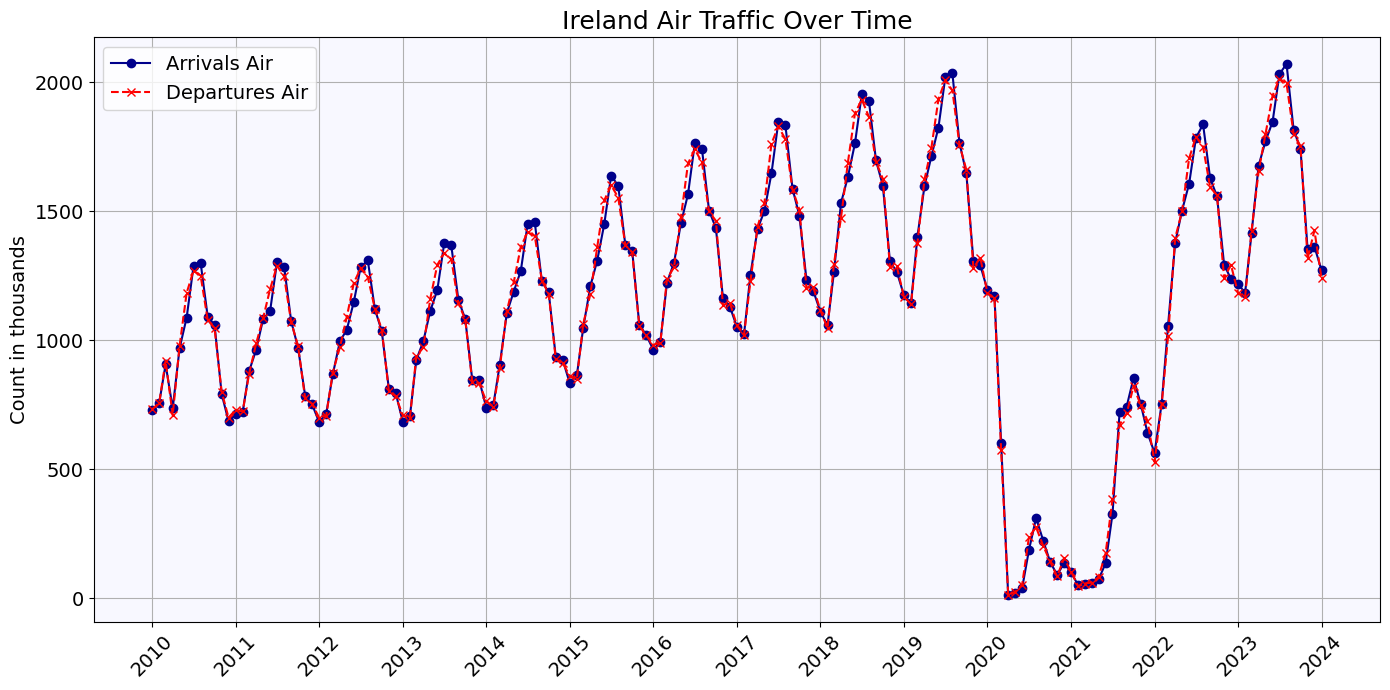

In [131]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Adjusting the size of plot
plt.figure(figsize=(14, 7))

# Creating a single subplot
ax = plt.subplot()

# Using high contrast colours and different line styles and marks trying to improve visualization.
# Plotting Sea Traffic data 
# ax.plot(df_pivoted.index, df_pivoted["Arrivals_Sea"], label='Arrivals Sea', color='darkgreen', marker='o')
# ax.plot(df_pivoted.index, df_pivoted["Departures_Sea"], label='Departures Sea', color='orange', marker='x', linestyle='--')

# Plotting Air Traffic data
ax.plot(df_pivoted.index, df_pivoted["Arrivals_Air"], label='Arrivals Air', color='darkblue', marker='o')
ax.plot(df_pivoted.index, df_pivoted["Departures_Air"], label='Departures Air', color='red', marker='x', linestyle='--')

# Adjusting the plot appearance setting the title and y-axis label
ax.set_facecolor('#F8F8FF')  # "Ghost White" Background color for the plot area
ax.set_title('Ireland Air Traffic Over Time', fontsize=18)
ax.set_ylabel('Count in thousands', fontsize=14)

# Adjusting the ticks on x axis to show only the years, avoiding the months to not over load the tick labels
ax.xaxis.set_major_locator(YearLocator())  # Major ticks every year
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # Format major ticks as full years, avoinding "-01" in every year, redundant

# Inclining and adjusting the size of tick labels
ax.tick_params(axis='x', rotation=45, labelsize="14")  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize="14")  # Adjust y-axis labels appearance
ax.legend(fontsize=14)  # Display legend and set your font size
ax.grid(True)  # Create a grid in every tick

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

In [132]:
#Count values
df_pivoted.count()

Values_in_Thousands
Arrivals_Air      169
Arrivals_Sea      169
Departures_Air    169
Departures_Sea    169
dtype: int64

In [133]:
#Min values
df_pivoted.min()

Values_in_Thousands
Arrivals_Air      12.1
Arrivals_Sea       4.0
Departures_Air    12.8
Departures_Sea     4.9
dtype: float64

In [134]:
#Max values
df_pivoted.max()

Values_in_Thousands
Arrivals_Air      2070.2
Arrivals_Sea       279.5
Departures_Air    2012.4
Departures_Sea     278.9
dtype: float64

In [135]:
#Sum values
df_pivoted.sum()

Values_in_Thousands
Arrivals_Air      190942.2
Arrivals_Sea       16504.2
Departures_Air    191367.7
Departures_Sea     16460.8
dtype: float64

In [136]:
# Getting Mean Values from each column
mean_df = df_pivoted.mean()

print("\nMean values for:")
print(mean_df)


Mean values for:
Values_in_Thousands
Arrivals_Air      1129.835503
Arrivals_Sea        97.657988
Departures_Air    1132.353254
Departures_Sea      97.401183
dtype: float64


In [137]:
# Getting Median Values from each column
median_df = df_pivoted.median()

print("\nMedian values for:")
print(median_df)


Median values for:
Values_in_Thousands
Arrivals_Air      1171.7
Arrivals_Sea        87.6
Departures_Air    1178.5
Departures_Sea      79.8
dtype: float64


In [138]:
# Calculating the range for each column
range_df = df_pivoted.max() - df_pivoted.min()
range_df

Values_in_Thousands
Arrivals_Air      2058.1
Arrivals_Sea       275.5
Departures_Air    1999.6
Departures_Sea     274.0
dtype: float64

In [139]:
# Calculating the midrange for each column
midrange_df = (df_pivoted.max() + df_pivoted.min()) / 2
midrange_df

Values_in_Thousands
Arrivals_Air      1041.15
Arrivals_Sea       141.75
Departures_Air    1012.60
Departures_Sea     141.90
dtype: float64

In [140]:
# Variance values
df_pivoted.var()

print(median_df)


Values_in_Thousands
Arrivals_Air      1171.7
Arrivals_Sea        87.6
Departures_Air    1178.5
Departures_Sea      79.8
dtype: float64


In [141]:
# Printing Standart deviation from each column of df_pivoted

print("Standart Deviation of")
print(f"Arrivals Air   :  " + str(df_pivoted["Arrivals_Air"].std()))
print(f"Arrivals Sea   :  " + str(df_pivoted["Arrivals_Sea"].std()))
print(f"Departues Air  :  " + str(df_pivoted["Departures_Air"].std()))
print(f"Departures Sea :  " + str(df_pivoted["Departures_Sea"].std()))

Standart Deviation of
Arrivals Air   :  474.6937485605992
Arrivals Sea   :  63.11120059994522
Departues Air  :  474.8545120595088
Departures Sea :  60.381057803323515


In [142]:
# Calculate quartiles
Q1 = df_pivoted.quantile(0.25)
Q2 = df_pivoted.quantile(0.5)
Q3 = df_pivoted.quantile(0.75)

# Print quartiles
print("First Quartile (Q1):\n", Q1)
print("\nSecond Quartile (Q2) / Median:\n", Q2)
print("\nThird Quartile (Q3):\n", Q3)

First Quartile (Q1):
 Values_in_Thousands
Arrivals_Air      846.0
Arrivals_Sea       48.9
Departures_Air    836.5
Departures_Sea     52.3
Name: 0.25, dtype: float64

Second Quartile (Q2) / Median:
 Values_in_Thousands
Arrivals_Air      1171.7
Arrivals_Sea        87.6
Departures_Air    1178.5
Departures_Sea      79.8
Name: 0.5, dtype: float64

Third Quartile (Q3):
 Values_in_Thousands
Arrivals_Air      1450.3
Arrivals_Sea       122.5
Departures_Air    1438.7
Departures_Sea     127.8
Name: 0.75, dtype: float64


In [143]:
# Calculate the first and third quartiles
Q1 = df_pivoted.quantile(0.25)
Q3 = df_pivoted.quantile(0.75)

# Calculate the Interquartile Range (IQR) for each column
IQR = Q3 - Q1

# Print the IQR
print("Interquartile Range (IQR):\n", IQR)


Interquartile Range (IQR):
 Values_in_Thousands
Arrivals_Air      604.3
Arrivals_Sea       73.6
Departures_Air    602.2
Departures_Sea     75.5
dtype: float64


In [144]:
# Calculate the first and third quartiles
Q1 = df_pivoted.quantile(0.25)
Q3 = df_pivoted.quantile(0.75)
IQR = Q3 - Q1

# Calculate the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
is_outlier = ((df_pivoted < lower_bound) | (df_pivoted > upper_bound))

# Applying the mask to the original DataFrame to get the actual values of the outliers
outlier_values = df_pivoted[is_outlier]

# Dropping rows where all values are NaN (no outliers)
outlier_rows = outlier_values.dropna(how='all')

# Displaying rows with outliers
outlier_rows

Values_in_Thousands,Arrivals_Air,Arrivals_Sea,Departures_Air,Departures_Sea
Year-Month,,,,
2010-07-01,NaN,233.4,NaN,NaN
2010-08-01,NaN,253.1,NaN,250.1
2011-08-01,NaN,249.4,NaN,245.5
2012-08-01,NaN,237.2,NaN,NaN
2013-08-01,NaN,252.2,NaN,248.4
2014-07-01,NaN,241.5,NaN,NaN
2014-08-01,NaN,279.5,NaN,278.9
2015-08-01,NaN,244.3,NaN,247.3
2017-08-01,NaN,237.9,NaN,NaN


In [145]:
# Calculate the Mean Absolute Deviation (MAD) for each column
means = df_pivoted.mean()
mad_manual = (df_pivoted.sub(means).abs()).mean()
print("Mean Absolute Deviation (MAD), for each column:\n", mad_manual)

Mean Absolute Deviation (MAD), for each column:
 Values_in_Thousands
Arrivals_Air      367.823725
Arrivals_Sea       48.433927
Departures_Air    368.858548
Departures_Sea     49.062869
dtype: float64


In [146]:
#Visualizing Descriptive Statistics with method "describe()"
df_pivoted.describe()

Values_in_Thousands,Arrivals_Air,Arrivals_Sea,Departures_Air,Departures_Sea
count,169.000000,169.000000,169.000000,169.000000
mean,1129.835503,97.657988,1132.353254,97.401183
std,474.693749,63.111201,474.854512,60.381058
min,12.100000,4.000000,12.800000,4.900000
25%,846.000000,48.900000,836.500000,52.300000
50%,1171.700000,87.600000,1178.500000,79.800000
75%,1450.300000,122.500000,1438.700000,127.800000
max,2070.200000,279.500000,2012.400000,278.900000


In [147]:
# Getting Mode Value(s) from each column
mode_df = df_pivoted.mode()

#print("\nMode values for: (Thousands)")
mode_df

Values_in_Thousands,Arrivals_Air,Arrivals_Sea,Departures_Air,Departures_Sea
0,1646.3,31.3,700.5,56.3
1,NaN,84.3,709.5,NaN
2,NaN,86.8,NaN,NaN
3,NaN,115.3,NaN,NaN
4,NaN,119.9,NaN,NaN


In [148]:
#Printing Mean Median and Mode(s) side by side

columns = ["Arrivals_Air", "Arrivals_Sea", "Departures_Air", "Departures_Sea"]

print(f"{'Values in Thousands':<20} {'Mean':<20} {'Median':<15} {'Mode(s)':<30}")
print('-' * 90)

for col in columns:
    mean_val = mean_df[col]
    median_val = median_df[col]
    # Including a "," between mode values
    modes_val = ', '.join(map(str, mode_df[col].dropna().to_list()))
    print(f"{col:<20} {mean_val:<20} {median_val:<15} {modes_val:<30}")

Values in Thousands  Mean                 Median          Mode(s)                       
------------------------------------------------------------------------------------------
Arrivals_Air         1129.83550295858     1171.7          1646.3                        
Arrivals_Sea         97.65798816568048    87.6            31.3, 84.3, 86.8, 115.3, 119.9
Departures_Air       1132.3532544378697   1178.5          700.5, 709.5                  
Departures_Sea       97.40118343195266    79.8            56.3                          


In [149]:
# Printing skewness from each column of df_pivoted
print("Skewness of")
print(f"Arrivals Air   :  " + str(df_pivoted["Arrivals_Air"].skew()))
print(f"Arrivals Sea   :  " + str(df_pivoted["Arrivals_Sea"].skew()))
print(f"Departues Air  :  " + str(df_pivoted["Departures_Air"].skew()))
print(f"Departures Sea :  " + str(df_pivoted["Departures_Sea"].skew()))

Skewness of
Arrivals Air   :  -0.4636333684824516
Arrivals Sea   :  0.9744111036253964
Departues Air  :  -0.46009266150436645
Departures Sea :  0.8685012404296856


In [150]:
# Calculate Fisher kurtosis
kurtosis_fisher = df_pivoted.kurtosis()

# Adjust to get Pearson kurtosis
kurtosis_pearson = kurtosis_fisher + 3

print("Fisher kurtosis:\n", kurtosis_fisher)
print("\nPearson kurtosis:\n", kurtosis_pearson)

Fisher kurtosis:
 Values_in_Thousands
Arrivals_Air      0.028394
Arrivals_Sea      0.352077
Departures_Air   -0.029283
Departures_Sea    0.118707
dtype: float64

Pearson kurtosis:
 Values_in_Thousands
Arrivals_Air      3.028394
Arrivals_Sea      3.352077
Departures_Air    2.970717
Departures_Sea    3.118707
dtype: float64


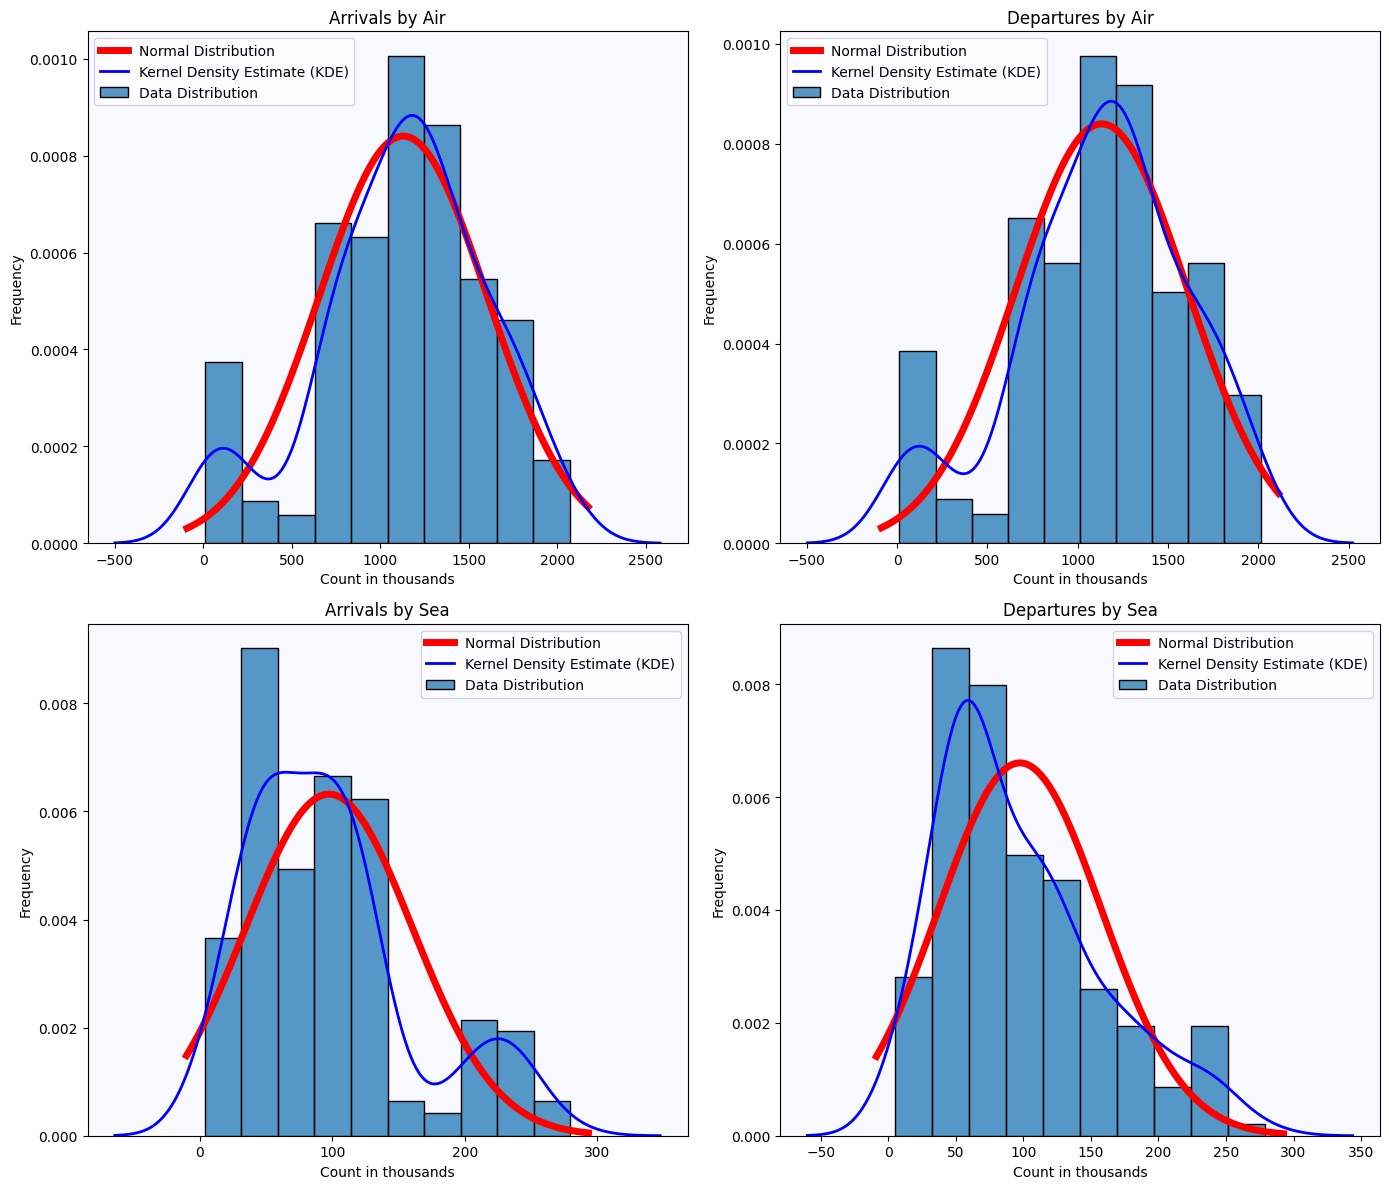

In [151]:
import seaborn as sns
from scipy.stats import norm

data_columns = ['Arrivals_Air', 'Departures_Air', 'Arrivals_Sea', 'Departures_Sea']
titles = ['Arrivals by Air', 'Departures by Air', 'Arrivals by Sea', 'Departures by Sea']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for ax, column, title in zip(axes, data_columns, titles):
    # Set the background color of each subplot
    ax.set_facecolor('ghostwhite')

    # Plot histogram without KDE
    sns.histplot(df_pivoted[column], bins=10, kde=False, ax=ax, stat="density", label="Data Distribution")

    # Calculate mean and standard deviation from the column
    mean = df_pivoted[column].mean()
    std = df_pivoted[column].std()

    # Generate points on the x axis for the normal distribution manually
    xmin, xmax = ax.get_xlim()
    x = [xmin + (xmax - xmin) * i / 99 for i in range(100)]

    # Plot the normal distribution curve
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, linewidth=5, color="red", label="Normal Distribution")

    # Explicitly plot the KDE to include in legend
    sns.kdeplot(df_pivoted[column], ax=ax, color="blue", linewidth=2, label="Kernel Density Estimate (KDE)")

    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel('Count in thousands')
    ax.set_ylabel('Frequency')

    # Legends
    ax.legend()

plt.tight_layout()
plt.show()

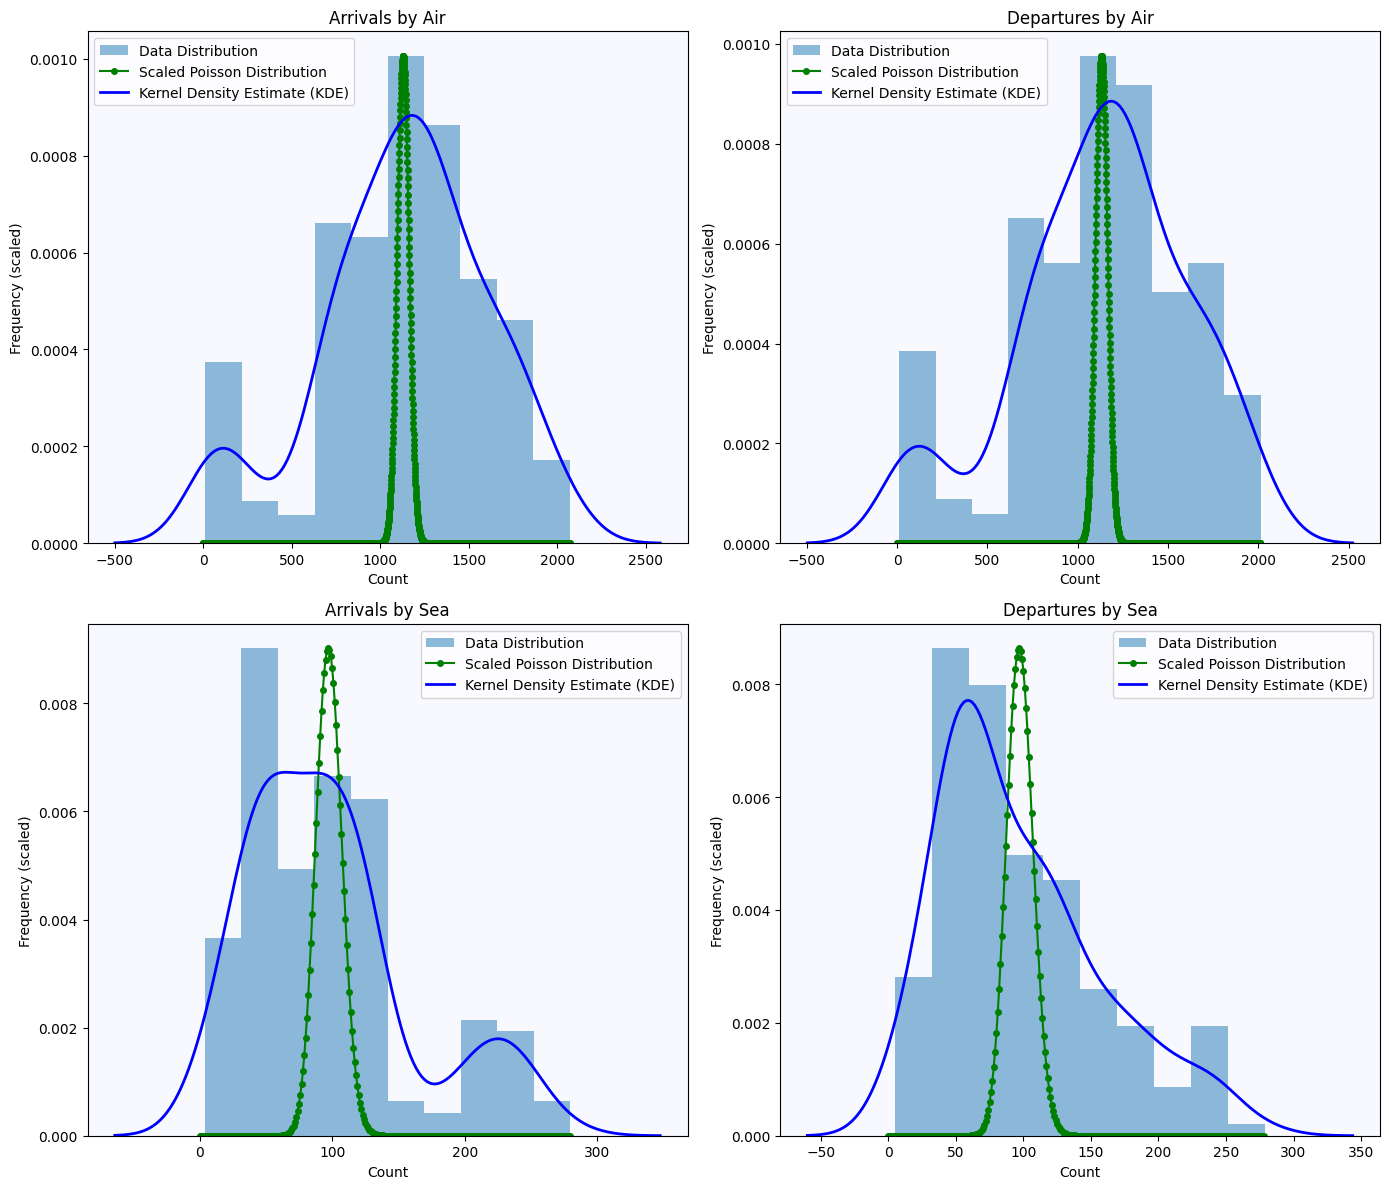

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson

data_columns = ['Arrivals_Air', 'Departures_Air', 'Arrivals_Sea', 'Departures_Sea']
titles = ['Arrivals by Air', 'Departures by Air', 'Arrivals by Sea', 'Departures by Sea']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for ax, column, title in zip(axes, data_columns, titles):
    sample_data = df_pivoted[column]
    ax.set_facecolor('ghostwhite')

    # Plot histogram and get the bin heights
    counts, bins, _ = ax.hist(sample_data, bins=10, density=True, label="Data Distribution", alpha=0.5)
    
    # Calculate mean for the Poisson distribution (λ)
    lambda_param = sample_data.mean()

    # Calculate the x values for the Poisson distribution
    x_poisson = range(0, int(max(sample_data)) + 1)
    # Calculate the Poisson probabilities
    poisson_probabilities = poisson.pmf(x_poisson, lambda_param)

    # Find the scaling factor to align the peak with the histogram
    peak_height = max(counts)
    poisson_peak_height = max(poisson_probabilities)
    scaling_factor = peak_height / poisson_peak_height

    # Scale the Poisson probabilities
    scaled_poisson_probabilities = poisson_probabilities * scaling_factor

    # Plot the scaled Poisson probabilities
    ax.plot(x_poisson, scaled_poisson_probabilities, 'o-', color="green", label="Scaled Poisson Distribution", markersize=4)

    # Plot KDE
    sns.kdeplot(sample_data, ax=ax, color="blue", linewidth=2, label="Kernel Density Estimate (KDE)")

    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel('Count')
    ax.set_ylabel('Frequency (scaled)')

    # Add legend
    ax.legend()

plt.tight_layout()
plt.show()

Results for Arrivals_Air:
ADF Statistic: -3.652024114925765
p-value: 0.004840881028639921
Critical Value (1%): -3.473542528196209
Critical Value (5%): -2.880497674144038
Critical Value (10%): -2.576878053634677
Stationary

Results for Arrivals_Sea:
ADF Statistic: -2.224467264034647
p-value: 0.19748538541512806
Critical Value (1%): -3.4732590518613002
Critical Value (5%): -2.880374082105334
Critical Value (10%): -2.5768120811654525
Not Stationary

Results for Departures_Air:
ADF Statistic: -3.760220526666124
p-value: 0.0033415643285432963
Critical Value (1%): -3.473542528196209
Critical Value (5%): -2.880497674144038
Critical Value (10%): -2.576878053634677
Stationary

Results for Departures_Sea:
ADF Statistic: -2.196961918647327
p-value: 0.20734995242767412
Critical Value (1%): -3.4729792729247793
Critical Value (5%): -2.8802520918255534
Critical Value (10%): -2.5767469641683105
Not Stationary



In [154]:
# Computing the correlation matrix
corr_matrix = df_pivoted.corr(method='pearson')

print(corr_matrix)

Values_in_Thousands  Arrivals_Air  Arrivals_Sea  Departures_Air  \
Values_in_Thousands                                               
Arrivals_Air             1.000000      0.653325        0.996781   
Arrivals_Sea             0.653325      1.000000        0.636192   
Departures_Air           0.996781      0.636192        1.000000   
Departures_Sea           0.664050      0.974867        0.654643   

Values_in_Thousands  Departures_Sea  
Values_in_Thousands                  
Arrivals_Air               0.664050  
Arrivals_Sea               0.974867  
Departures_Air             0.654643  
Departures_Sea             1.000000  


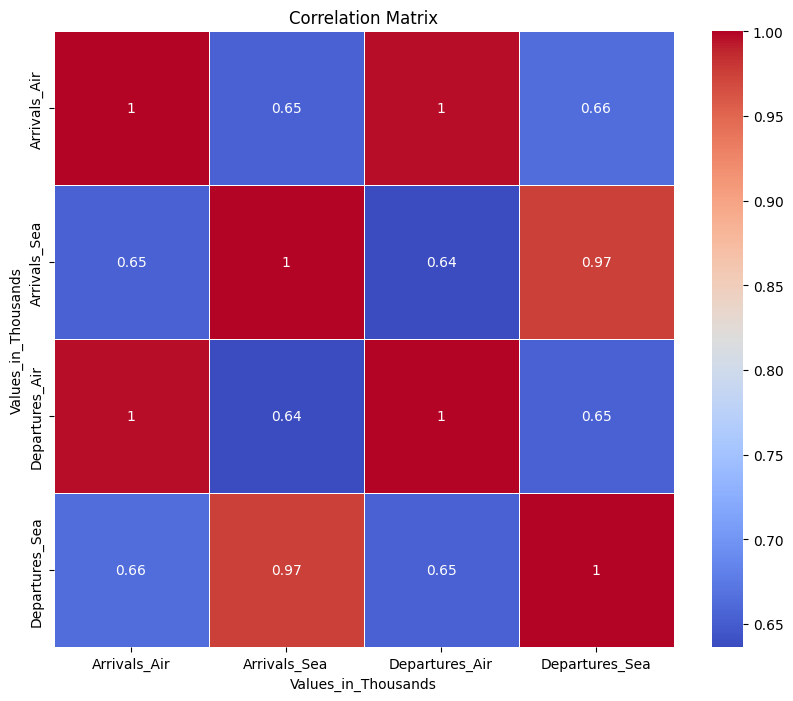

In [155]:
#Plotting the correlation matrix map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

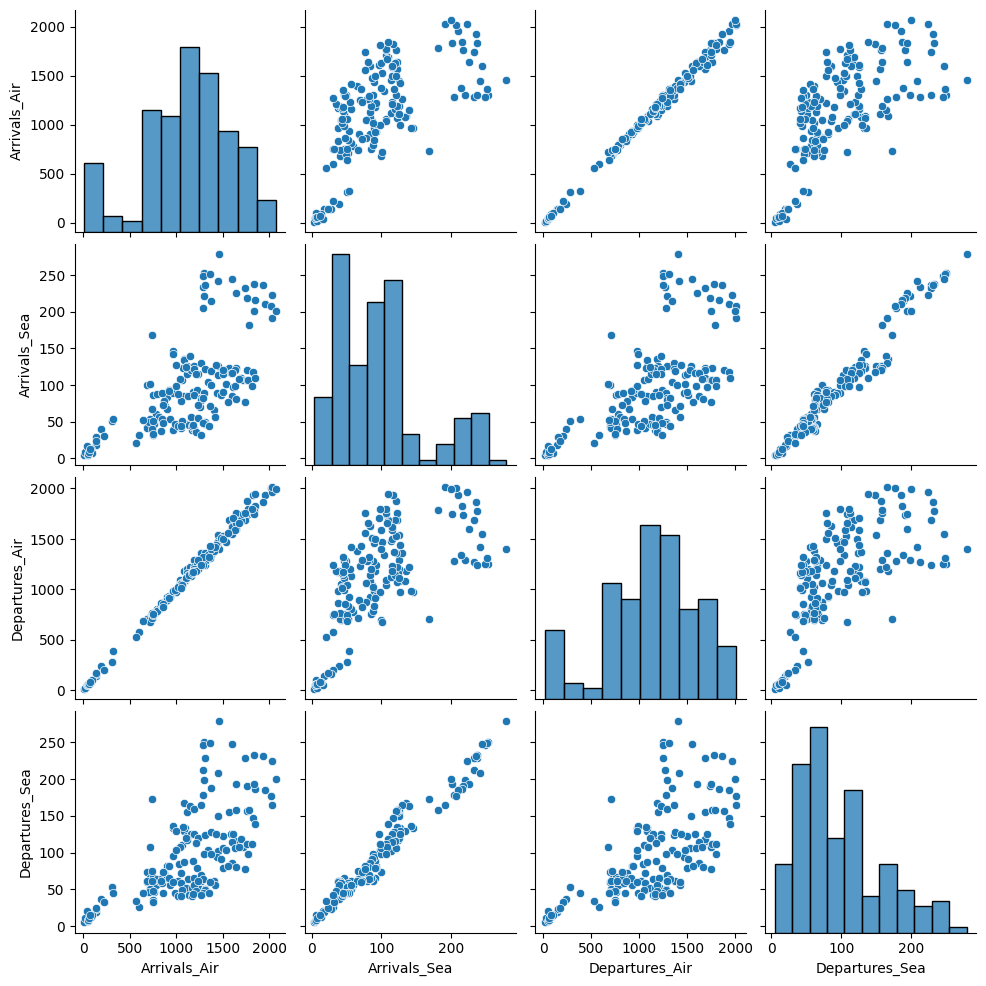

In [156]:
# Creates a grid with histogramns and correlation scatter plots for each pair of columns
sns.pairplot(df_pivoted)

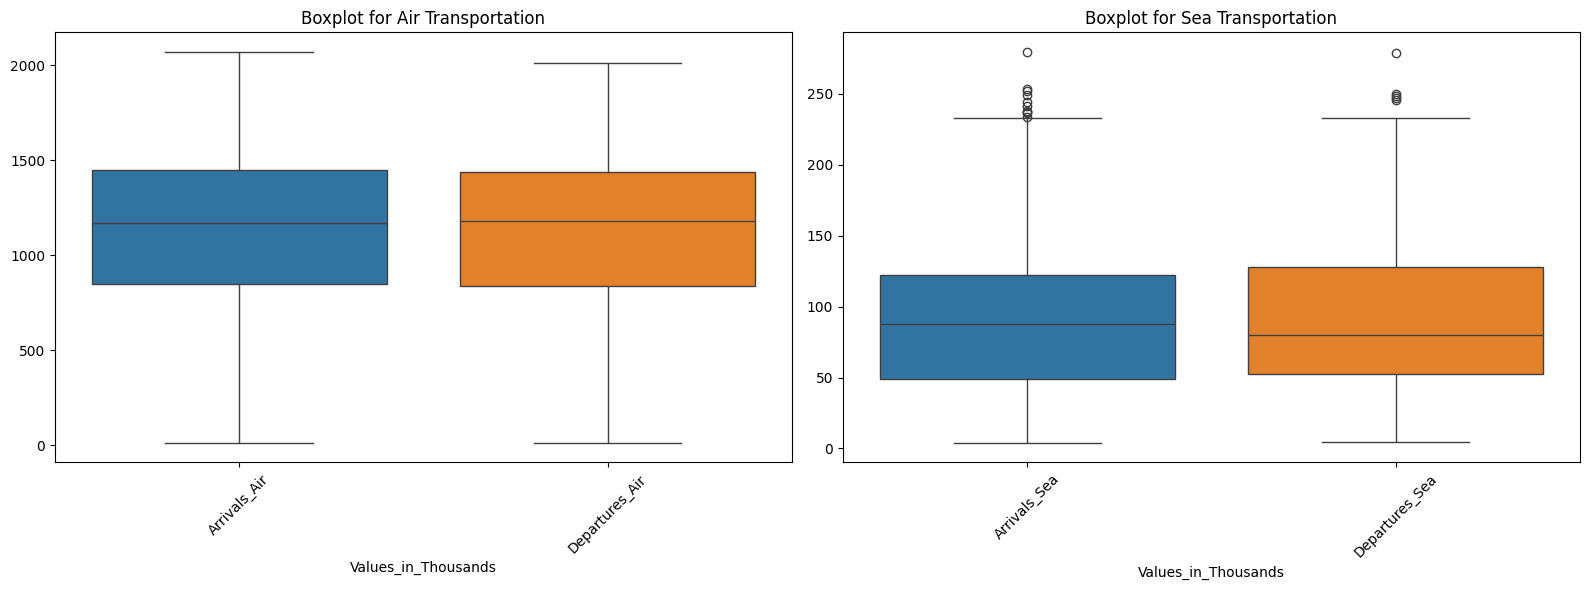

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_pivoted is your DataFrame

# Select columns for 'Air' and 'Sea' modes
air_columns = [col for col in df_pivoted.columns if 'Air' in col]
df_air = df_pivoted[air_columns]

sea_columns = [col for col in df_pivoted.columns if 'Sea' in col]
df_sea = df_pivoted[sea_columns]

# Create a figure with 1 row and 2 columns for subplots, not sharing the Y-axis
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting boxplots for 'Air' mode on the first subplot
sns.boxplot(data=df_air, ax=axs[0])
axs[0].set_title('Boxplot for Air Transportation')
axs[0].tick_params(axis='x', rotation=45)

# Plotting boxplots for 'Sea' mode on the second subplot
sns.boxplot(data=df_sea, ax=axs[1])
axs[1].set_title('Boxplot for Sea Transportation')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout for better fit and readability
plt.tight_layout()

plt.show()

In [158]:
# Calculating the IQR for each column in df_pivoted
Q1 = df_pivoted.quantile(0.25)
Q3 = df_pivoted.quantile(0.75)
IQR = Q3 - Q1

print("\nInter Quartile Range values for: (Thousands)\n")
print(range_df)


Inter Quartile Range values for: (Thousands)

Values_in_Thousands
Arrivals_Air      2058.1
Arrivals_Sea       275.5
Departures_Air    1999.6
Departures_Sea     274.0
dtype: float64


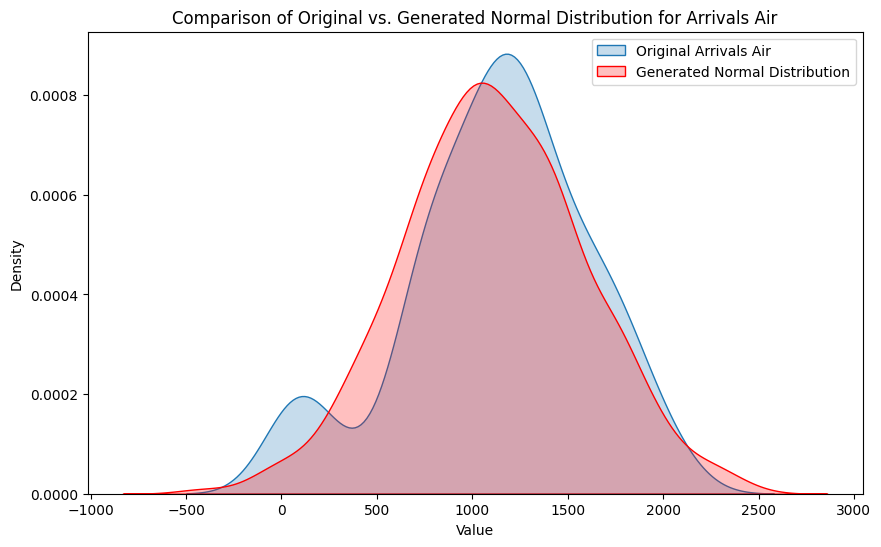

In [165]:
import numpy as np

# Calculate the mean and standard deviation of the 'Arrivals - Air' column
mean_arrivals_air = df_pivoted['Arrivals_Air'].mean()
std_arrivals_air = df_pivoted['Arrivals_Air'].std()

# Generate a normally distributed dataset with the same mean and standard deviation
normal_arrivals_air = np.random.normal(loc=mean_arrivals_air, scale=std_arrivals_air, size=1000)

# Example: Plot the original data vs. the generated normal distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df_pivoted['Arrivals_Air'], fill=True, label='Original Arrivals Air')
sns.kdeplot(normal_arrivals_air, fill=True, label='Generated Normal Distribution', color='red')
plt.legend()
plt.title('Comparison of Original vs. Generated Normal Distribution for Arrivals Air')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


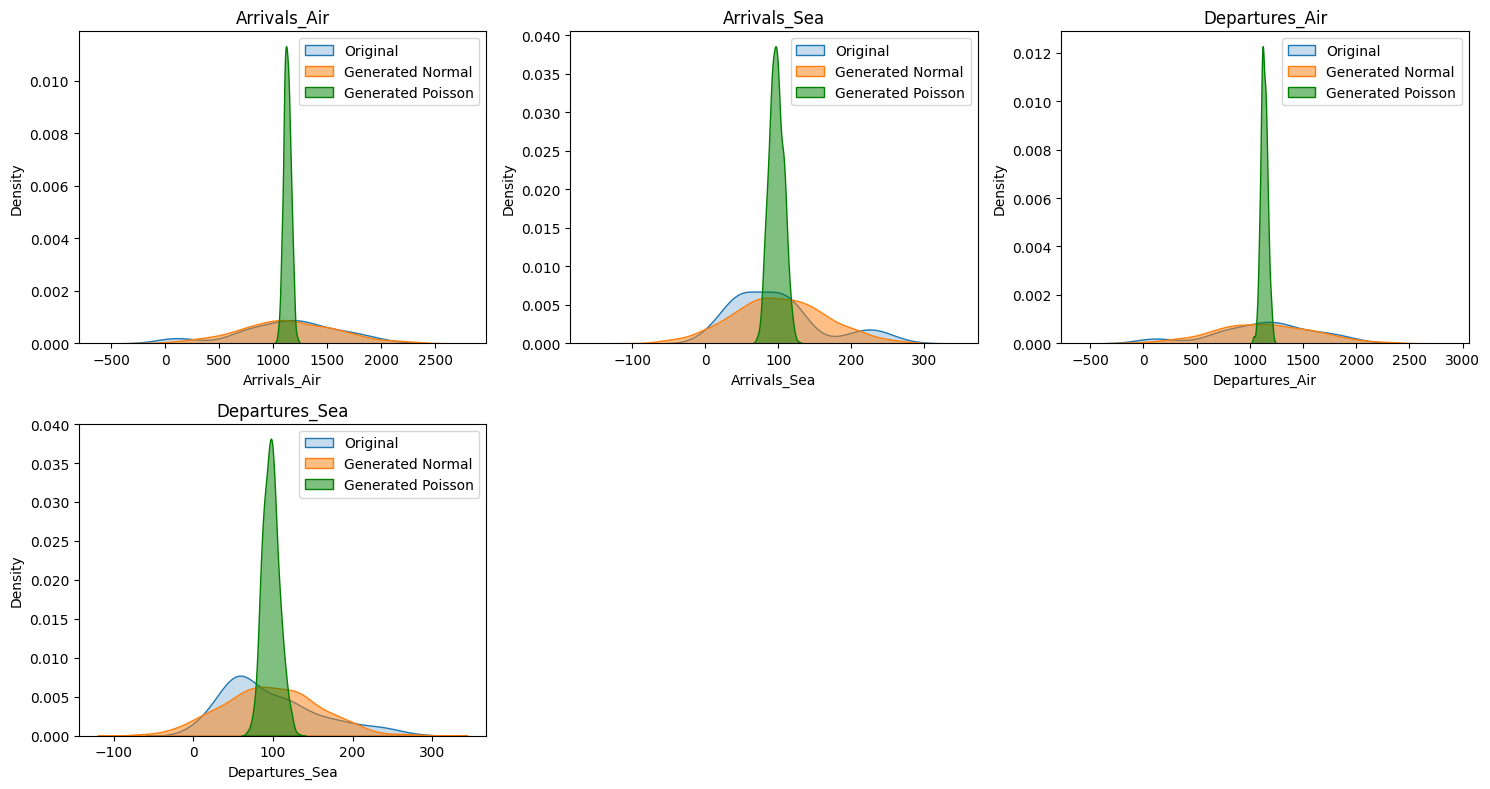

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

num_columns = df_pivoted.shape[1]
n_cols = 3  # Number of columns in the plot grid
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original')
    
    # Generated normal distribution data based on the column's mean and std
    mean = df_pivoted[column].mean()
    std = df_pivoted[column].std()
    normal_data = np.random.normal(loc=mean, scale=std, size=1000)
    sns.kdeplot(normal_data, fill=True, label='Generated Normal', alpha=0.5)
    
    # Generated Poisson distribution data based on the column's mean (λ)
    poisson_data = np.random.poisson(lam=mean, size=1000)
    sns.kdeplot(poisson_data, fill=True, label='Generated Poisson', alpha=0.5, color='green')
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()

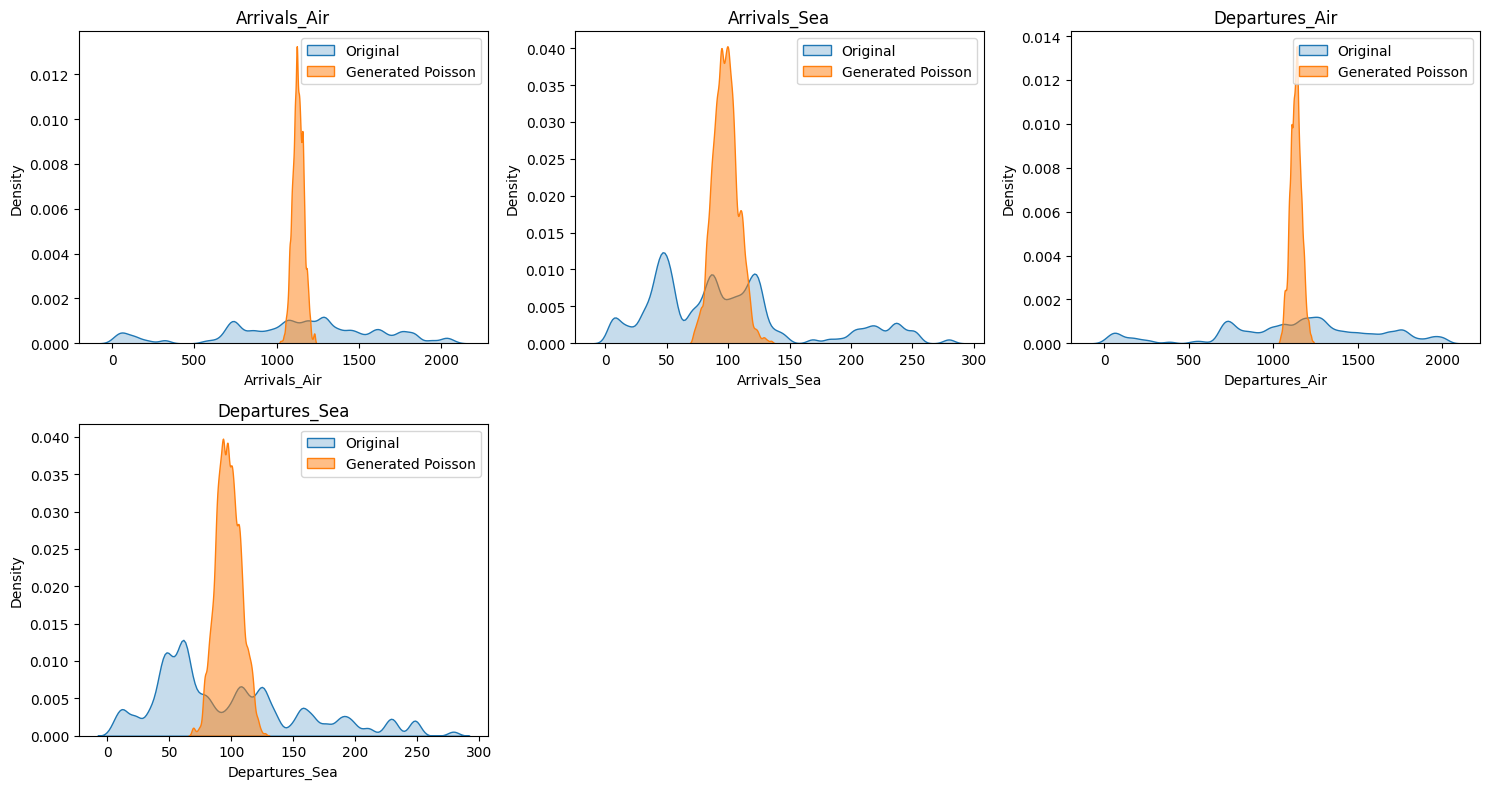

In [168]:
n_cols = 3  # Number of columns in the plot grid
num_columns = df_pivoted.shape[1]
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.2)
    
    # Calculate lambda (mean) for the Poisson distribution from the original data
    lambda_param = df_pivoted[column].mean()
    
    # Generated Poisson distribution data based on the column's mean
    poisson_data = np.random.poisson(lam=lambda_param, size=1000)
    sns.kdeplot(poisson_data, fill=True, label='Generated Poisson', alpha=0.5, bw_adjust=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()

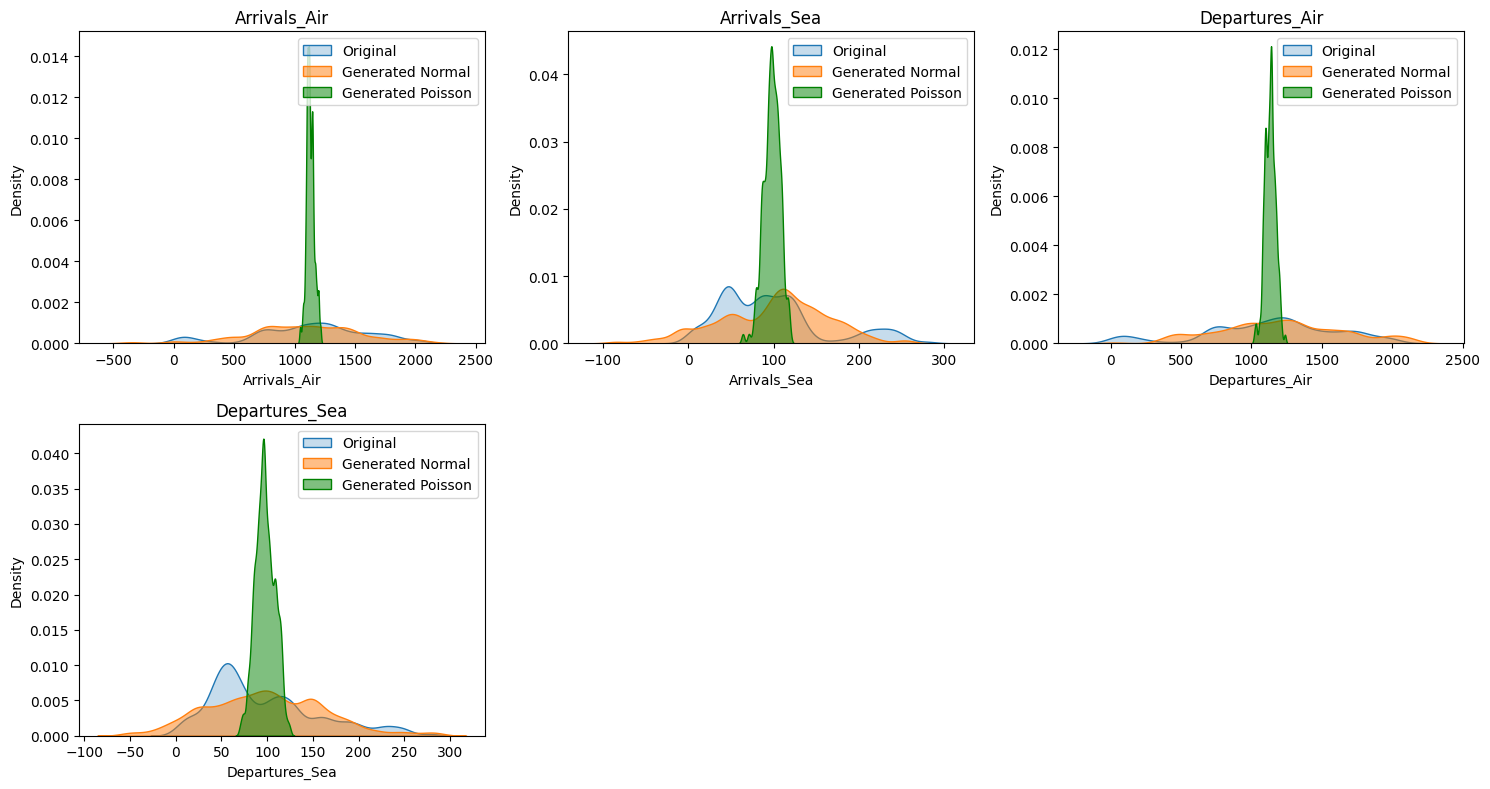

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

num_columns = df_pivoted.shape[1]
n_cols = 3  # Number of columns in the plot grid
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.5)
    
    # Generated normal distribution data based on the column's mean and std
    mean = df_pivoted[column].mean()
    std = df_pivoted[column].std()
    # We generate as many points as there are in the actual data
    normal_data = np.random.normal(loc=mean, scale=std, size=len(df_pivoted[column]))
    sns.kdeplot(normal_data, fill=True, label='Generated Normal', alpha=0.5, bw_adjust=0.5)
    
    # Generated Poisson distribution data based on the column's mean (λ)
    # Again, generate as many points as the actual data
    poisson_data = np.random.poisson(lam=mean, size=len(df_pivoted[column]))
    sns.kdeplot(poisson_data, fill=True, label='Generated Poisson', alpha=0.5, color='green', bw_adjust=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()